In [42]:
import pandas as pd
import matplotlib.pyplot as plt


In [43]:
df_fire = pd.read_csv('data/WFIGS_Interagency_Fire_Perimeters.csv')
df_travel = pd.read_csv('data/california_jul_2019.csv', index_col=0)

In [44]:
df_travel

,geoid_o,geoid_d,lng_o,lat_o,lng_d,lat_d,date,visitor_flows,pop_flows
19307,6037,6037,-118.261017,34.198001,-118.261017,34.198001,2019-07-23,1034193,20735310.0
19308,6037,6059,-118.261017,34.198001,-117.776146,33.676913,2019-07-23,28948,580400.0
19309,6037,6065,-118.261017,34.198001,-115.993849,33.743680,2019-07-23,5916,118614.0
19310,6037,6071,-118.261017,34.198001,-116.178461,34.841438,2019-07-23,12652,253669.0
19510,6037,6001,-118.261017,34.198001,-121.917885,37.650547,2019-07-23,703,14094.0
...,...,...,...,...,...,...,...,...,...
699813,6091,6113,-120.515996,39.580400,-121.901620,38.686646,2019-08-01,1,26.0
699815,6091,6057,-120.515996,39.580400,-120.768752,39.301370,2019-08-01,31,811.0
699816,6091,6035,-120.515996,39.580400,-120.594333,40.673590,2019-08-01,3,78.0
699817,6091,6115,-120.515996,39.580400,-121.351263,39.269008,2019-08-01,2,52.0


In [45]:
df_fire.dropna(inplace=True)

In [46]:
df_fire.attr_LocalIncidentIdentifier

Series([], Name: attr_LocalIncidentIdentifier, dtype: object)

In [47]:
import geopandas as gpd
from shapely.geometry import Point, LineString

# Convert fire data to GeoDataFrame
gdf_fire = gpd.GeoDataFrame(df_fire, geometry=gpd.points_from_xy(df_fire.attr_InitialLongitude, df_fire.attr_InitialLatitude))
# Buffer around fire points (in this case, I used 0.1 as an arbitrary distance. It needs to be chosen wisely)
gdf_fire.geometry = gdf_fire.geometry.buffer(0.0001) 

# Create LineString for each travel pair
df_travel['line'] = df_travel.apply(lambda row: LineString([(row['lng_o'], row['lat_o']), (row['lng_d'], row['lat_d'])]), axis=1)
gdf_travel = gpd.GeoDataFrame(df_travel, geometry='line')

# Check if these lines intersect with any fire and store the fire location
result = gpd.sjoin(gdf_travel, gdf_fire, predicate='intersects', how='left')
df_travel['fire_impact'] = result.notna().any(axis=1)
df_travel['fire_location'] = result.geometry

/Users/luisquinonespr/miniforge3/lib/python3.9/site-packages/pandas/core/dtypes/cast.py:127: ShapelyDeprecationWarning: The array interface is deprecated and will no longer work in Shapely 2.0. Convert the '.coords' to a numpy array instead.
  arr = construct_1d_object_array_from_listlike(values)


In [49]:
df_travel

,geoid_o,geoid_d,lng_o,lat_o,lng_d,lat_d,date,visitor_flows,pop_flows,line,fire_impact,fire_location
19307,6037,6037,-118.261017,34.198001,-118.261017,34.198001,2019-07-23,1034193,20735310.0,"LINESTRING (-118.26102 34.19800, -118.26102 34...",True,"LINESTRING (-118.26102 34.19800, -118.26102 34..."
19308,6037,6059,-118.261017,34.198001,-117.776146,33.676913,2019-07-23,28948,580400.0,"LINESTRING (-118.26102 34.19800, -117.77615 33...",True,"LINESTRING (-118.26102 34.19800, -117.77615 33..."
19309,6037,6065,-118.261017,34.198001,-115.993849,33.743680,2019-07-23,5916,118614.0,"LINESTRING (-118.26102 34.19800, -115.99385 33...",True,"LINESTRING (-118.26102 34.19800, -115.99385 33..."
19310,6037,6071,-118.261017,34.198001,-116.178461,34.841438,2019-07-23,12652,253669.0,"LINESTRING (-118.26102 34.19800, -116.17846 34...",True,"LINESTRING (-118.26102 34.19800, -116.17846 34..."
19510,6037,6001,-118.261017,34.198001,-121.917885,37.650547,2019-07-23,703,14094.0,"LINESTRING (-118.26102 34.19800, -121.91789 37...",True,"LINESTRING (-118.26102 34.19800, -121.91789 37..."
...,...,...,...,...,...,...,...,...,...,...,...,...
699813,6091,6113,-120.515996,39.580400,-121.901620,38.686646,2019-08-01,1,26.0,"LINESTRING (-120.51600 39.58040, -121.90162 38...",True,"LINESTRING (-120.51600 39.58040, -121.90162 38..."
699815,6091,6057,-120.515996,39.580400,-120.768752,39.301370,2019-08-01,31,811.0,"LINESTRING (-120.51600 39.58040, -120.76875 39...",True,"LINESTRING (-120.51600 39.58040, -120.76875 39..."
699816,6091,6035,-120.515996,39.580400,-120.594333,40.673590,2019-08-01,3,78.0,"LINESTRING (-120.51600 39.58040, -120.59433 40...",True,"LINESTRING (-120.51600 39.58040, -120.59433 40..."
699817,6091,6115,-120.515996,39.580400,-121.351263,39.269008,2019-08-01,2,52.0,"LINESTRING (-120.51600 39.58040, -121.35126 39...",True,"LINESTRING (-120.51600 39.58040, -121.35126 39..."


/Users/luisquinonespr/miniforge3/lib/python3.9/site-packages/geopandas/plotting.py:693: UserWarning: The GeoDataFrame you are attempting to plot is empty. Nothing has been displayed.
  warnings.warn(


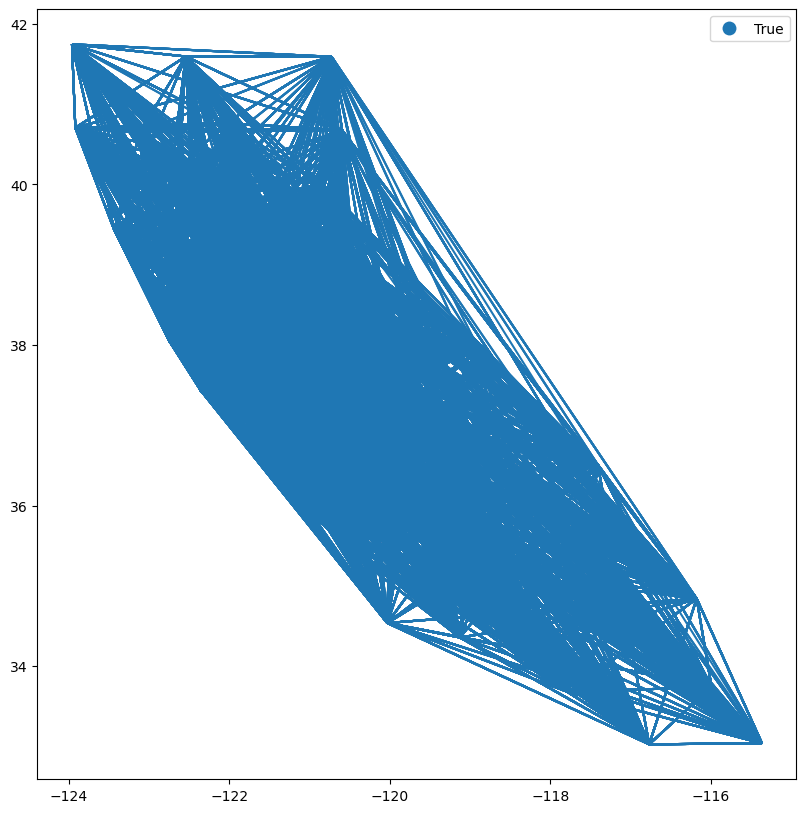

In [48]:
# fig, ax = plt.subplots(1, 1, figsize=(10, 10))

# # Plot travel data
# gdf_travel.plot(column='fire_impact', legend=True, ax=ax)

# # Plot fire data
# gdf_fire.plot(color='red', ax=ax)

# plt.show()
